In [10]:
# Imports
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import pandas as pd
import colorcet as cc
from matplotlib.ticker import FuncFormatter

sns.set_style("ticks")
sns.set_context("poster")
palette = sns.color_palette(cc.glasbey_category10, n_colors=25)
color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

## Plot tools
- Variance of agent importance plot
- Agents' agent importance value plot

In [11]:
def agent_importance_variance_plot(dict_algo_data: dict):
    fig, ax = plt.subplots(figsize=(8, 8))
    i=0
    for algo, data in dict_algo_data.items():
        agent_keys = [
        k for k in data[list(data.keys())[0]].keys() if k.endswith("_importance_value")
        ]
        agent_values = {key: [] for key in agent_keys}
        for time_step in data.keys():
            for agent_key in agent_keys:
                if data[time_step][agent_key]:
                    agent_values[agent_key].append(dict_algo_data[algo][time_step][agent_key])

        window_size = 30
        smoothed_importances = []
        for agent_key in agent_keys:
            mean_values = [np.mean(val) for val in agent_values[agent_key]]
            smoothed_values = (
                pd.Series(mean_values)
                .rolling(window=window_size, min_periods=1, center=True)
                .mean()
            )
            smoothed_importances.append(smoothed_values)

        smoothed_importances = np.array(smoothed_importances)
        var_importances = np.var(smoothed_importances, axis=0)

        sns.lineplot(
            x=np.linspace(0, 2, len(smoothed_values)),
            y=var_importances,
            color=palette[i],
            label=algo,
            ax=ax,
        )
        i+=1 # Color palette index

    ax.set_xlabel("Number of timesteps (Millions)")
    ax.set_xlim(0, 2.05)
    ax.set_xticks(np.arange(0, 2.5, 0.5))

    ax.set_ylabel("Agent Importance Variance (1e-6)")  # Update y-axis label

    # Custom formatter for y-axis ticks
    formatter = FuncFormatter(lambda x, _: round((x * 1e6), 2) if x != 0 else "0")
    ax.yaxis.set_major_formatter(formatter)

    ax.legend()
    plt.show()

In [12]:
def agent_importance_value_plot(dict_algo_data:dict):
    fig, ax = plt.subplots(figsize=(8, 8))
    i=0
    for algo, data in dict_algo_data.items():
        agent_keys = [
            k for k in data[list(data.keys())[0]].keys() if k.endswith("_importance_value")
        ]

        agent_values = {key: [] for key in agent_keys}

        for time_step in data.keys():
            for agent_key in agent_keys:
                if data[time_step][agent_key]:
                    agent_values[agent_key].append(data[time_step][agent_key])

        window_size = 30
        for agent_key in agent_keys:
            mean_values = [np.mean(val) for val in agent_values[agent_key]]
            smoothed_values = (
                pd.Series(mean_values)
                .rolling(window=window_size, min_periods=1, center=True)
                .mean()
            )

            agent_id = agent_key.split("_")[1]
            # This conditional used to edit the legend.
            if int(agent_id) == 0:
                ax.plot(
                    np.linspace(0, 2, len(smoothed_values)),
                    smoothed_values,
                    label=f"{algo} Agents",
                    color=palette[i],
                )
            else:
                ax.plot(
                    np.linspace(0, 2, len(smoothed_values)),
                    smoothed_values,
                    label="_nolegend_",
                    color=palette[i],
                )  # Use '_nolegend_' to exclude from legend
        i+=1 # Palette index


    ax.set_xlabel("Number of timesteps (Millions)")
    ax.set_ylabel("Agent Importance Value (1e-2)")
    formatter = FuncFormatter(lambda x, _: round((x * 1e2), 2) if x != 0 else "0")
    ax.yaxis.set_major_formatter(formatter)
    handles, labels = ax.get_legend_handles_labels()  # Get legend handles and labels
    handles = [
        h for h, l in zip(handles, labels) if l != "_nolegend_"
    ]  # Exclude '_nolegend_' handles
    labels = [l for l in labels if l != "_nolegend_"]  # Exclude '_nolegend_' labels
    ax.set_xlim(0, 2.05)
    ax.set_xticks(np.arange(0, 2.5, 0.5))
    ax.legend(handles, labels)
    plt.show()

## Figure 6: MAA2C outperforms MAPPO on the LBF 15x15-3p-5f task

In [13]:
# Load data
json_path = "minimal_experiment_data/ps_experiments/mappo/lbforaging:Foraging-15x15-3p-5f-v2/5/agent_importance/master_agent_importance.json"
with open(json_path, "r") as file:
    mappo = json.load(file)
json_path = "minimal_experiment_data/ps_experiments/maa2c/lbforaging:Foraging-15x15-3p-5f-v2/5/agent_importance/master_agent_importance.json"
with open(json_path, "r") as file:
    maa2c = json.load(file)
# Create `dict_algo_data`
algo_data={
    "MAPPO":mappo,
    "MAA2C":maa2c
}

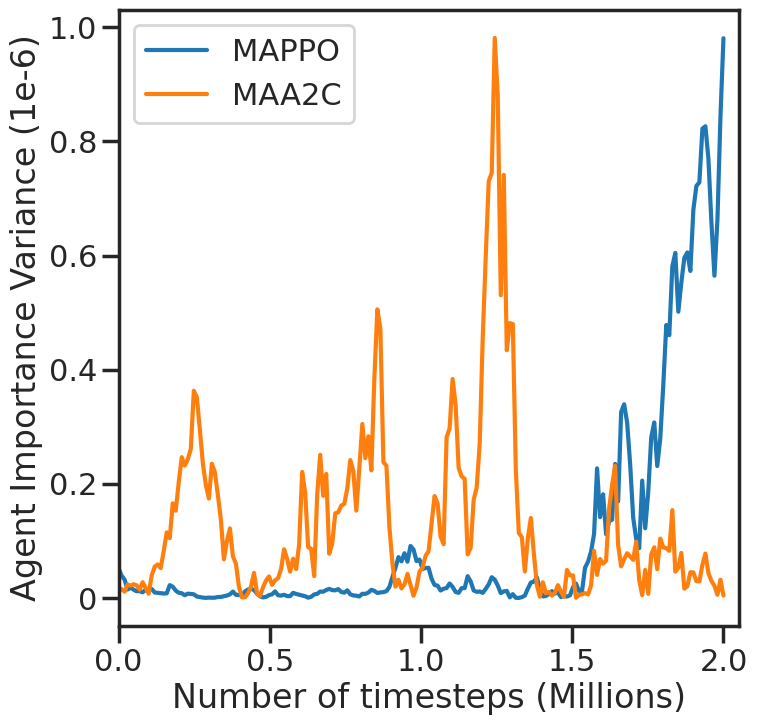

In [14]:
agent_importance_variance_plot(algo_data)

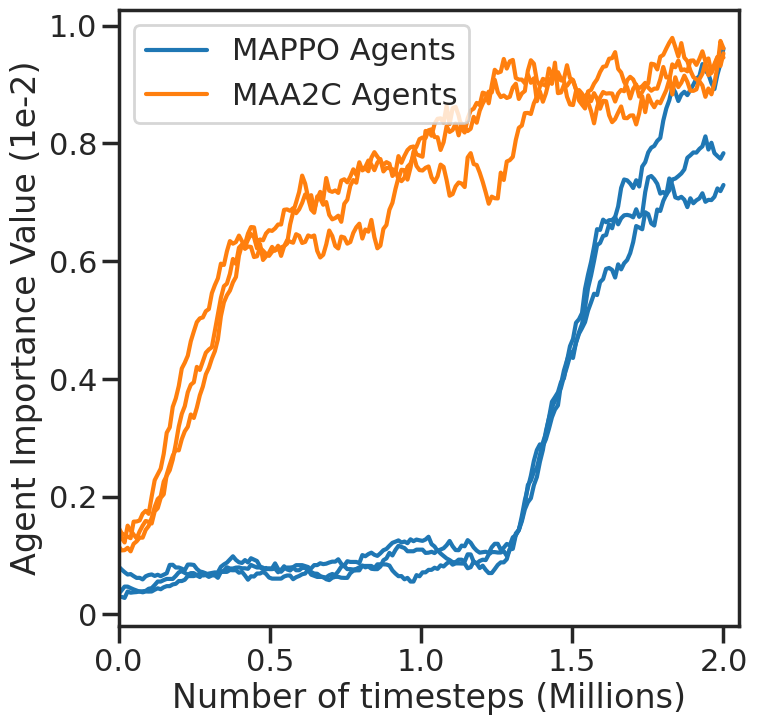

In [15]:
agent_importance_value_plot(algo_data)

## Figure 7: Comparison of performance with and without parameter sharing on the LBF 10x10-3p-3f task for one seed

### 1. Parameter sharing IQL, VDN and QMIX plots:

In [16]:
# Load data 
json_path = "minimal_experiment_data/ps_experiments/iql/lbforaging:Foraging-10x10-3p-3f-v2/0/agent_importance/master_agent_importance.json"
with open(json_path, "r") as file:
    iql = json.load(file)
json_path = "minimal_experiment_data/ps_experiments/qmix/lbforaging:Foraging-10x10-3p-3f-v2/0/agent_importance/master_agent_importance.json"
with open(json_path, "r") as file:
    qmix = json.load(file)
json_path = "minimal_experiment_data/ps_experiments/vdn/lbforaging:Foraging-10x10-3p-3f-v2/0/agent_importance/master_agent_importance.json"
with open(json_path, "r") as file:
    vdn = json.load(file)
# Create `dict_algo_data`
algo_data={
    "IQL":iql,
    "QMIX": qmix,
    "VDN":vdn
}

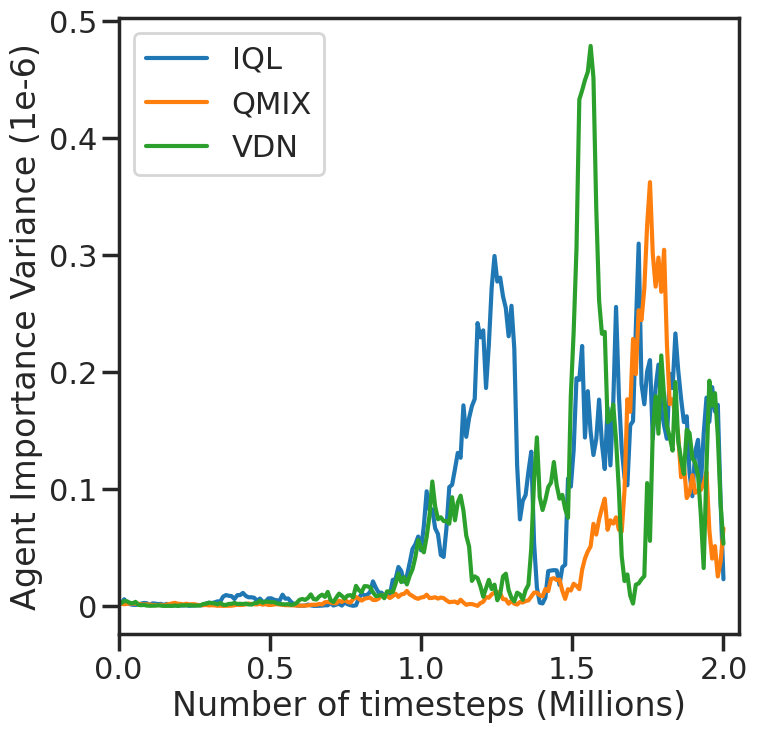

In [17]:
agent_importance_variance_plot(algo_data)

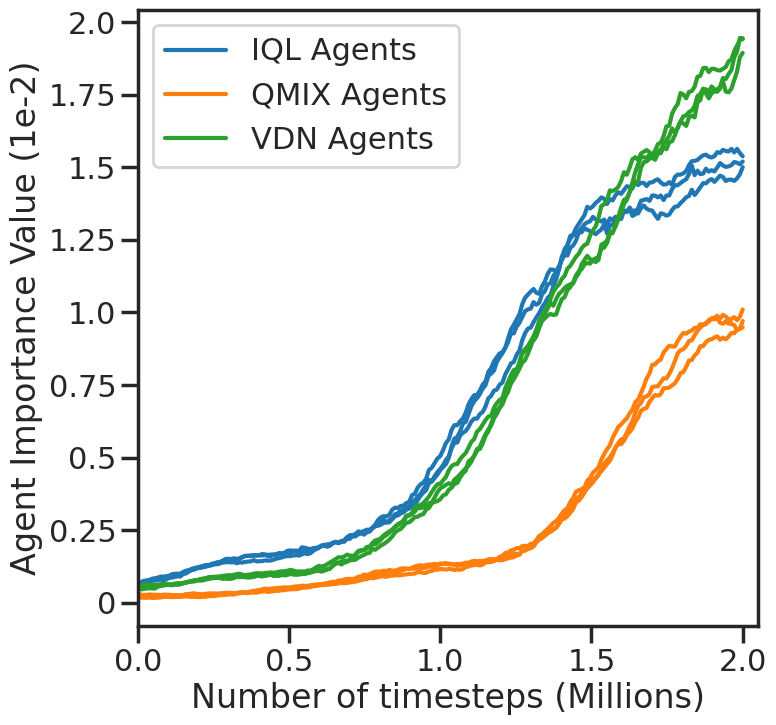

In [18]:
agent_importance_value_plot(algo_data)

### 2. Non Parameter sharing IQL-NS, VDN-NS and QMIX-NS plots:

In [19]:
# Load data 
json_path = "minimal_experiment_data/non_ps_experiments/iql/lbforaging:Foraging-10x10-3p-3f-v2/0/agent_importance/master_agent_importance.json"
with open(json_path, "r") as file:
    iql = json.load(file)
json_path = "minimal_experiment_data/non_ps_experiments/qmix/lbforaging:Foraging-10x10-3p-3f-v2/0/agent_importance/master_agent_importance.json"
with open(json_path, "r") as file:
    qmix = json.load(file)
json_path = "minimal_experiment_data/non_ps_experiments/vdn/lbforaging:Foraging-10x10-3p-3f-v2/0/agent_importance/master_agent_importance.json"
with open(json_path, "r") as file:
    vdn = json.load(file)
# Create `dict_algo_data`
algo_data={
    "IQL-NS":iql,
    "QMIX-NS": qmix,
    "VDN-NS":vdn
}

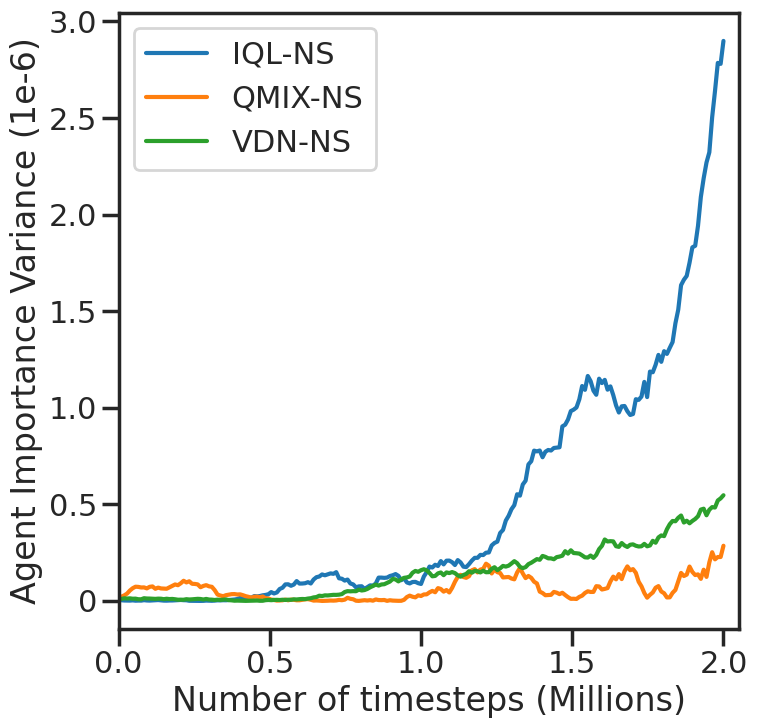

In [20]:
agent_importance_variance_plot(algo_data)

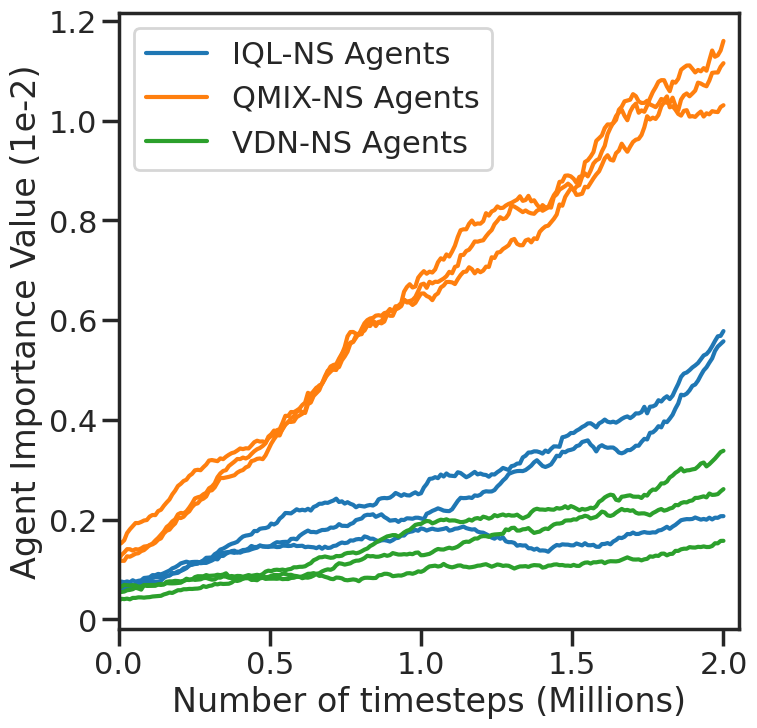

In [21]:
agent_importance_value_plot(algo_data)